In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sl

In [3]:

df = pd.read_csv('./bench_SDRbench_and_jhtdb_lz4_comp.csv')

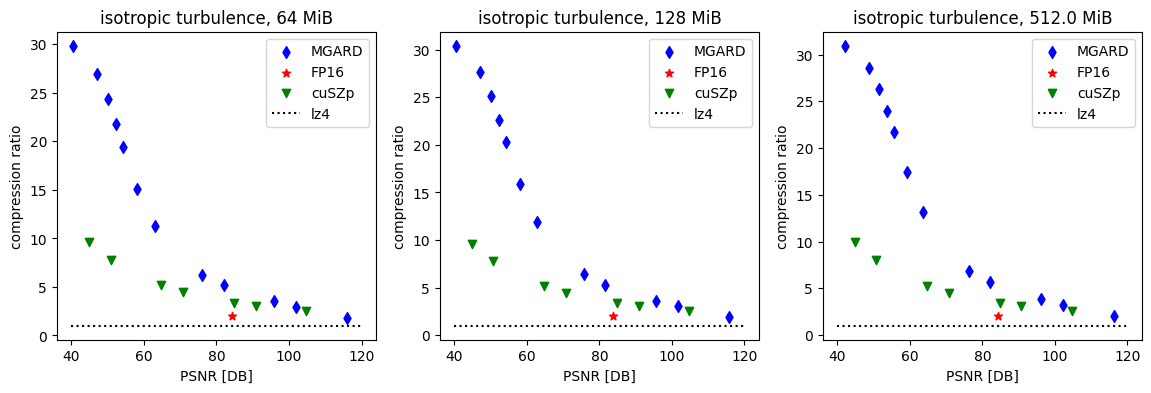

In [14]:
fig, axs = plt.subplots(1, 3, figsize=(14, 4))
targetsizes = [67108864,134793068,536870912]
datasets = [
    "NYX/SDRBENCH-EXASKY-NYX-512x512x512/dark_matter_density.f32",
    "SDRBENCH-SCALE_98x1200x1200/V-98x1200x1200.f32",
    "JHTDB"
]
datasets = "JHTDB"
data_name = "isotropic turbulence"

# 64MiB
n_min = 40
n_max = 120
targetsize = 67108864

mgard = df[(df["oriSize"] == targetsize) & (df["method"] == "MGARD") & (df["data"] == datasets) & (df["psnr"] > n_min) & (df["psnr"] < n_max) ]
fp16 = df[(df["oriSize"] == targetsize) & (df["method"] == "numpy") & (df["data"] == datasets) & (df["psnr"] < n_max)]
cuszp = df[(df["oriSize"] == targetsize) & (df["method"] == "cuSZp") & (df["data"] == datasets) & (df["psnr"] > n_min) & (df["psnr"] < n_max)]
lz4 = df[(df["oriSize"] == targetsize) & (df["method"] == "LZ4") & (df["data"] == datasets) & (df["psnr"] < n_max)]

psnr_max = max(max(mgard["psnr"].values),max(cuszp["psnr"].values),n_max)

fp16_comp_ratio = 2

axs[0].scatter(mgard["psnr"].values, mgard["comp_ratio"].values, label='MGARD', marker='d', color='blue',)
axs[0].scatter(fp16["psnr"].iloc[0], fp16_comp_ratio,label="FP16",color="red",marker='*')
axs[0].scatter(cuszp["psnr"].values,cuszp["comp_ratio"].values,label="cuSZp",color="green",marker='v')

axs[0].hlines(lz4["comp_ratio"], xmin=n_min, xmax=psnr_max, color='black', linestyle=':', label='lz4')

axs[0].set_ylabel("compression ratio")
axs[0].set_xlabel("PSNR [DB]")
axs[0].set_title(f"{data_name}, {64} MiB")
axs[0].legend()


# 128MiB
targetsize = 134793068

mgard = df[(df["oriSize"] == targetsize) & (df["method"] == "MGARD") & (df["data"] == datasets) & (df["psnr"] > n_min) & (df["psnr"] < n_max) ]
fp16 = df[(df["oriSize"] == targetsize) & (df["method"] == "numpy") & (df["data"] == datasets) & (df["psnr"] < n_max)]
cuszp = df[(df["oriSize"] == targetsize) & (df["method"] == "cuSZp") & (df["data"] == datasets) & (df["psnr"] > n_min) & (df["psnr"] < n_max)]
lz4 = df[(df["oriSize"] == targetsize) & (df["method"] == "LZ4") & (df["data"] == datasets) & (df["psnr"] < n_max)]

psnr_max = max(max(mgard["psnr"].values),max(cuszp["psnr"].values),n_max)

fp16_comp_ratio = 2

axs[1].scatter(mgard["psnr"].values, mgard["comp_ratio"].values, label='MGARD', marker='d', color='blue',)
axs[1].scatter(fp16["psnr"].iloc[0], fp16_comp_ratio,label="FP16",color="red",marker='*')
axs[1].scatter(cuszp["psnr"].values,cuszp["comp_ratio"].values,label="cuSZp",color="green",marker='v')
axs[1].hlines(lz4["comp_ratio"], xmin=n_min, xmax=psnr_max, color='black', linestyle=':', label='lz4')


axs[1].set_ylabel("compression ratio")
axs[1].set_xlabel("PSNR [DB]")
axs[1].set_title(f"{data_name}, {128} MiB")
axs[1].legend()


# 512MiB
targetsize = 536870912

mgard = df[(df["oriSize"] == targetsize) & (df["method"] == "MGARD") & (df["data"] == datasets) & (df["psnr"] > n_min) & (df["psnr"] < n_max) ]
fp16 = df[(df["oriSize"] == targetsize) & (df["method"] == "numpy") & (df["data"] == datasets) & (df["psnr"] < n_max)]
cuszp = df[(df["oriSize"] == targetsize) & (df["method"] == "cuSZp") & (df["data"] == datasets) & (df["psnr"] > n_min) & (df["psnr"] < n_max)]
lz4 = df[(df["oriSize"] == targetsize) & (df["method"] == "LZ4") & (df["data"] == datasets) & (df["psnr"] < n_max)]

psnr_max = max(max(mgard["psnr"].values),max(cuszp["psnr"].values),n_max)

fp16_comp_ratio = 2

axs[2].scatter(mgard["psnr"].values, mgard["comp_ratio"].values, label='MGARD', marker='d', color='blue',)
axs[2].scatter(fp16["psnr"].iloc[0], fp16_comp_ratio,label="FP16",color="red",marker='*')
axs[2].scatter(cuszp["psnr"].values,cuszp["comp_ratio"].values,label="cuSZp",color="green",marker='v')

axs[2].hlines(lz4["comp_ratio"], xmin=n_min, xmax=psnr_max, color='black', linestyle=':', label='lz4')

axs[2].set_ylabel("compression ratio")
axs[2].set_xlabel("PSNR [DB]")
axs[2].set_title(f"{data_name}, {targetsize/1024/1024} MiB")
axs[2].legend()

plt.show()


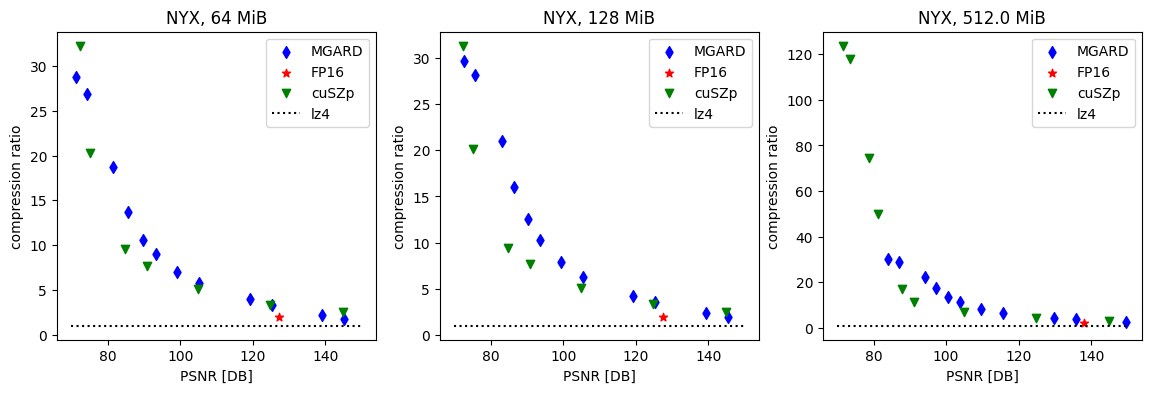

In [11]:
fig, axs = plt.subplots(1, 3, figsize=(14, 4))
targetsizes = [67108864,134793068,536870912]
datasets = [
    "NYX/SDRBENCH-EXASKY-NYX-512x512x512/dark_matter_density.f32",
    "SDRBENCH-SCALE_98x1200x1200/V-98x1200x1200.f32",
    "JHTDB"
]
datasets = "NYX/SDRBENCH-EXASKY-NYX-512x512x512/dark_matter_density.f32"
data_name = "NYX"

# 64MiB
n_min = 70
n_max = 150
targetsize = 67108864

mgard = df[(df["oriSize"] == targetsize) & (df["method"] == "MGARD") & (df["data"] == datasets) & (df["psnr"] > n_min) & (df["psnr"] < n_max) ]
fp16 = df[(df["oriSize"] == targetsize) & (df["method"] == "numpy") & (df["data"] == datasets) & (df["psnr"] < n_max)]
cuszp = df[(df["oriSize"] == targetsize) & (df["method"] == "cuSZp") & (df["data"] == datasets) & (df["psnr"] > n_min) & (df["psnr"] < n_max)]
lz4 = df[(df["oriSize"] == targetsize) & (df["method"] == "LZ4") & (df["data"] == datasets) & (df["psnr"] < n_max)]

psnr_max = max(max(mgard["psnr"].values),max(cuszp["psnr"].values),n_max)

fp16_comp_ratio = 2

axs[0].scatter(mgard["psnr"].values, mgard["comp_ratio"].values, label='MGARD', marker='d', color='blue',)
axs[0].scatter(fp16["psnr"].iloc[0], fp16_comp_ratio,label="FP16",color="red",marker='*')
axs[0].scatter(cuszp["psnr"].values,cuszp["comp_ratio"].values,label="cuSZp",color="green",marker='v')

axs[0].hlines(lz4["comp_ratio"], xmin=n_min, xmax=psnr_max, color='black', linestyle=':', label='lz4')

axs[0].set_ylabel("compression ratio")
axs[0].set_xlabel("PSNR [DB]")
axs[0].set_title(f"{data_name}, {64} MiB")
axs[0].legend()


# 128MiB
targetsize = 134793068

mgard = df[(df["oriSize"] == targetsize) & (df["method"] == "MGARD") & (df["data"] == datasets) & (df["psnr"] > n_min) & (df["psnr"] < n_max) ]
fp16 = df[(df["oriSize"] == targetsize) & (df["method"] == "numpy") & (df["data"] == datasets) & (df["psnr"] < n_max)]
cuszp = df[(df["oriSize"] == targetsize) & (df["method"] == "cuSZp") & (df["data"] == datasets) & (df["psnr"] > n_min) & (df["psnr"] < n_max)]
lz4 = df[(df["oriSize"] == targetsize) & (df["method"] == "LZ4") & (df["data"] == datasets) & (df["psnr"] < n_max)]

psnr_max = max(max(mgard["psnr"].values),max(cuszp["psnr"].values),n_max)

fp16_comp_ratio = 2

axs[1].scatter(mgard["psnr"].values, mgard["comp_ratio"].values, label='MGARD', marker='d', color='blue',)
axs[1].scatter(fp16["psnr"].iloc[0], fp16_comp_ratio,label="FP16",color="red",marker='*')
axs[1].scatter(cuszp["psnr"].values,cuszp["comp_ratio"].values,label="cuSZp",color="green",marker='v')
axs[1].hlines(lz4["comp_ratio"], xmin=n_min, xmax=psnr_max, color='black', linestyle=':', label='lz4')


axs[1].set_ylabel("compression ratio")
axs[1].set_xlabel("PSNR [DB]")
axs[1].set_title(f"{data_name}, {128} MiB")
axs[1].legend()


# 512MiB
targetsize = 536870912

mgard = df[(df["oriSize"] == targetsize) & (df["method"] == "MGARD") & (df["data"] == datasets) & (df["psnr"] > n_min) & (df["psnr"] < n_max) ]
fp16 = df[(df["oriSize"] == targetsize) & (df["method"] == "numpy") & (df["data"] == datasets) & (df["psnr"] < n_max)]
cuszp = df[(df["oriSize"] == targetsize) & (df["method"] == "cuSZp") & (df["data"] == datasets) & (df["psnr"] > n_min) & (df["psnr"] < n_max)]
lz4 = df[(df["oriSize"] == targetsize) & (df["method"] == "LZ4") & (df["data"] == datasets) & (df["psnr"] < n_max)]

psnr_max = max(max(mgard["psnr"].values),max(cuszp["psnr"].values),n_max)

fp16_comp_ratio = 2

axs[2].scatter(mgard["psnr"].values, mgard["comp_ratio"].values, label='MGARD', marker='d', color='blue',)
axs[2].scatter(fp16["psnr"].iloc[0], fp16_comp_ratio,label="FP16",color="red",marker='*')
axs[2].scatter(cuszp["psnr"].values,cuszp["comp_ratio"].values,label="cuSZp",color="green",marker='v')

axs[2].hlines(lz4["comp_ratio"], xmin=n_min, xmax=psnr_max, color='black', linestyle=':', label='lz4')

axs[2].set_ylabel("compression ratio")
axs[2].set_xlabel("PSNR [DB]")
axs[2].set_title(f"{data_name}, {targetsize/1024/1024} MiB")
axs[2].legend()

plt.show()


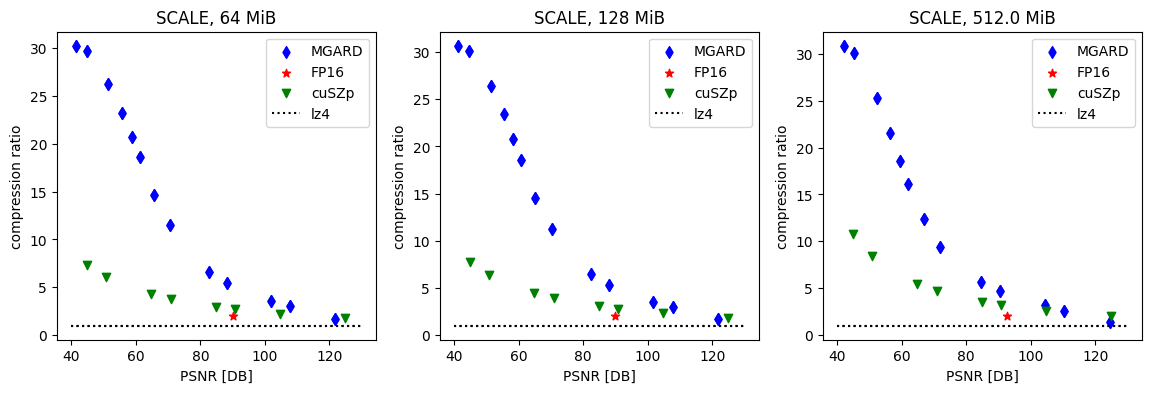

In [13]:
fig, axs = plt.subplots(1, 3, figsize=(14, 4))
targetsizes = [67108864,134793068,536870912]
datasets = [
    "NYX/SDRBENCH-EXASKY-NYX-512x512x512/dark_matter_density.f32",
    "SDRBENCH-SCALE_98x1200x1200/V-98x1200x1200.f32",
    "JHTDB"
]
datasets = "SDRBENCH-SCALE_98x1200x1200/V-98x1200x1200.f32"
data_name = "SCALE"

# 64MiB
n_min = 40
n_max = 130
targetsize = 67108864

mgard = df[(df["oriSize"] == targetsize) & (df["method"] == "MGARD") & (df["data"] == datasets) & (df["psnr"] > n_min) & (df["psnr"] < n_max) ]
fp16 = df[(df["oriSize"] == targetsize) & (df["method"] == "numpy") & (df["data"] == datasets) & (df["psnr"] < n_max)]
cuszp = df[(df["oriSize"] == targetsize) & (df["method"] == "cuSZp") & (df["data"] == datasets) & (df["psnr"] > n_min) & (df["psnr"] < n_max)]
lz4 = df[(df["oriSize"] == targetsize) & (df["method"] == "LZ4") & (df["data"] == datasets) & (df["psnr"] < n_max)]

psnr_max = max(max(mgard["psnr"].values),max(cuszp["psnr"].values),n_max)

fp16_comp_ratio = 2

axs[0].scatter(mgard["psnr"].values, mgard["comp_ratio"].values, label='MGARD', marker='d', color='blue',)
axs[0].scatter(fp16["psnr"].iloc[0], fp16_comp_ratio,label="FP16",color="red",marker='*')
axs[0].scatter(cuszp["psnr"].values,cuszp["comp_ratio"].values,label="cuSZp",color="green",marker='v')

axs[0].hlines(lz4["comp_ratio"], xmin=n_min, xmax=psnr_max, color='black', linestyle=':', label='lz4')

axs[0].set_ylabel("compression ratio")
axs[0].set_xlabel("PSNR [DB]")
axs[0].set_title(f"{data_name}, {64} MiB")
axs[0].legend()


# 128MiB
targetsize = 134793068

mgard = df[(df["oriSize"] == targetsize) & (df["method"] == "MGARD") & (df["data"] == datasets) & (df["psnr"] > n_min) & (df["psnr"] < n_max) ]
fp16 = df[(df["oriSize"] == targetsize) & (df["method"] == "numpy") & (df["data"] == datasets) & (df["psnr"] < n_max)]
cuszp = df[(df["oriSize"] == targetsize) & (df["method"] == "cuSZp") & (df["data"] == datasets) & (df["psnr"] > n_min) & (df["psnr"] < n_max)]
lz4 = df[(df["oriSize"] == targetsize) & (df["method"] == "LZ4") & (df["data"] == datasets) & (df["psnr"] < n_max)]

psnr_max = max(max(mgard["psnr"].values),max(cuszp["psnr"].values),n_max)

fp16_comp_ratio = 2

axs[1].scatter(mgard["psnr"].values, mgard["comp_ratio"].values, label='MGARD', marker='d', color='blue',)
axs[1].scatter(fp16["psnr"].iloc[0], fp16_comp_ratio,label="FP16",color="red",marker='*')
axs[1].scatter(cuszp["psnr"].values,cuszp["comp_ratio"].values,label="cuSZp",color="green",marker='v')
axs[1].hlines(lz4["comp_ratio"], xmin=n_min, xmax=psnr_max, color='black', linestyle=':', label='lz4')


axs[1].set_ylabel("compression ratio")
axs[1].set_xlabel("PSNR [DB]")
axs[1].set_title(f"{data_name}, {128} MiB")
axs[1].legend()


# 512MiB
targetsize = 536870912

mgard = df[(df["oriSize"] == targetsize) & (df["method"] == "MGARD") & (df["data"] == datasets) & (df["psnr"] > n_min) & (df["psnr"] < n_max) ]
fp16 = df[(df["oriSize"] == targetsize) & (df["method"] == "numpy") & (df["data"] == datasets) & (df["psnr"] < n_max)]
cuszp = df[(df["oriSize"] == targetsize) & (df["method"] == "cuSZp") & (df["data"] == datasets) & (df["psnr"] > n_min) & (df["psnr"] < n_max)]
lz4 = df[(df["oriSize"] == targetsize) & (df["method"] == "LZ4") & (df["data"] == datasets) & (df["psnr"] < n_max)]

psnr_max = max(max(mgard["psnr"].values),max(cuszp["psnr"].values),n_max)

fp16_comp_ratio = 2

axs[2].scatter(mgard["psnr"].values, mgard["comp_ratio"].values, label='MGARD', marker='d', color='blue',)
axs[2].scatter(fp16["psnr"].iloc[0], fp16_comp_ratio,label="FP16",color="red",marker='*')
axs[2].scatter(cuszp["psnr"].values,cuszp["comp_ratio"].values,label="cuSZp",color="green",marker='v')

axs[2].hlines(lz4["comp_ratio"], xmin=n_min, xmax=psnr_max, color='black', linestyle=':', label='lz4')

axs[2].set_ylabel("compression ratio")
axs[2].set_xlabel("PSNR [DB]")
axs[2].set_title(f"{data_name}, {targetsize/1024/1024} MiB")
axs[2].legend()

plt.show()
